In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep


In [ ]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
class Planeta:

    def __init__(self, e, a, t):
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo

        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.G = 4*np.pi**2 # Unidades gaussianas

        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)

        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )

        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        # El valor del pasado
        self.rp = self.r

    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()

        if i==0:
            self.r = self.rp + self.v*self.dt
        else:

            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)

            self.rp = self.r
            self.r = self.rf

    def SetPosition(self,i):
        self.R[i] = self.r

    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetPerihelio(self):

        Dist = np.linalg.norm(self.R,axis=1)

        timeup = []

        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])

        return timeup

In [ ]:
def GetPlaneta(t):
  Tierra= Planeta(0.01671,1,t)
  Venus=Planeta(0.0067,0.7233,t)
  Mercurio=Planeta(0.2056,0.387,t)
  Marte=Planeta(0.0934,1.524,t)
  Jupiter=Planeta(0.0483,5.2044,t)
  return [Tierra,Mercurio,Venus,Marte,Jupiter]

dt = 0.001
tmax = 20
t = np.arange(0,tmax,dt)
Planetas = GetPlaneta(t)

In [ ]:
def RunSimulation(t,Planetas):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared


    return Planetas

In [ ]:
Planetas = RunSimulation(t,Planetas)
scale = 13
t1 = t[::scale]

Running simulation: 100%|██████████| 20000/20000 [00:04<00:00, 4927.58 Steps/s]


In [ ]:
Planetas[4].GetPerihelio()

[3.742, 15.614]

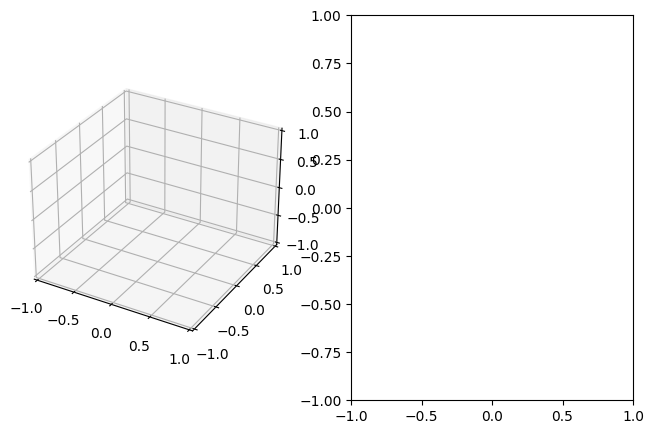

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122)

def init():

    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)

    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)

def Update(i):

    init()

    for j, p in enumerate(Planetas):

        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]

        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]

        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,length=0.03)

        ax.scatter(x,y,z,color='b')


Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

b)

In [ ]:
PeriodoOrbita=[]
for i in range(len(Planetas)):
  periodo= Planetas[i].GetPerihelio()[1]-Planetas[i].GetPerihelio()[0]
  PeriodoOrbita.append(periodo)
PeriodoOrbita

[0.9999999999999999, 0.24100000000000002, 0.615, 1.881, 11.872]

c)

Text(0, 0.5, 'T^2')

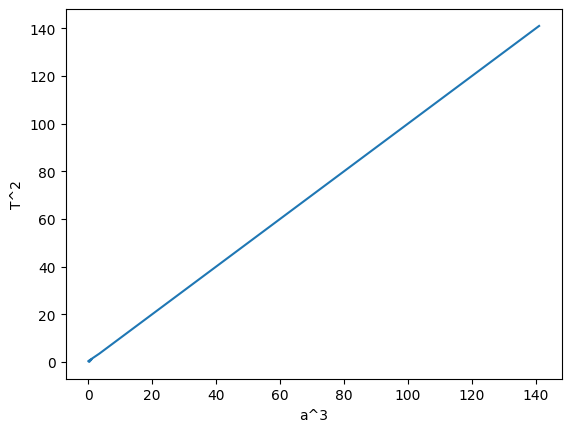

In [ ]:
xx=[1,0.7233,0.387,1.524,5.2044]
xx=[x**3 for x in xx]
yy=[x**2 for x in PeriodoOrbita]
plt.plot(xx,yy)
plt.xlabel("a^3")
plt.ylabel("T^2")


d)

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array(xx).reshape(-1, 1)
y = np.array(yy)

model = LinearRegression()
model.fit(X, y)

print("Pendiente:", model.coef_[0])
print("Intercepto:", model.intercept_)

Pendiente: 0.9998467848359489
Intercepto: 2.2316833216962095e-06


e)

In [ ]:
M=(model.coef_[0])**(-1)*(4*np.pi**2)/((6.67428*10**-10*3.17098*10**-9)*10**(-11))
M

1.865642201971917e+30